# Introduction to Machine Learning with scikit-learn
## Lab 3: Regression
The goal of this lab session is to discover a few regression tools from scikit-learn. As for the classification lab, we will start with generated data to have a more visual idea of the results.

In [170]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### Generating the data
As we did during the classification lab, we generate some data points uniformly using `np.random.rand`. In this example, we will generate a set of data points $x \in [0, 1]$ and their images $y$ under the function $f$ defined by
$$ y = f(x) = \cos \left( \dfrac{3\pi}{2} x \right)$$
which will be modeled by `my_function`.

We also add some noise following a Gaussian distribution (`np.random.randn`) centered in 0.

In [171]:
import numpy as np

np.random.seed(0)

n_samples = 30

def my_function(X):
    return np.cos(1.5 * np.pi * X)
    
X = np.random.rand(n_samples)
y = my_function(X) + np.random.randn(n_samples) * 0.1

In [172]:
X.shape

(30,)

Let us also generate the testing points needed to plot the result of our prediction. In this case, we generate 100 points uniformly spread between 0 and 1 using `np.linspace`.

In [173]:
X_test = np.linspace(0, 1, 100)

In [174]:
X_test

array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.69

With this, we can plot $f$ and the generated points.

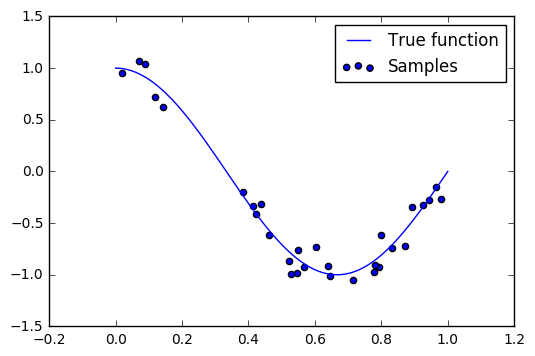

In [175]:
import matplotlib.pyplot as plt
plt.plot(X_test, my_function(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.legend(loc="best")

Note that the samples are not on the function curve because of the additive noise.

### Linear regression
Recall that the linear regression with a squared loss aims at finding the solution of the following optimization problem:
$$\min_w \sum_i \left(w^T \phi\left(x^{(i)}\right) - y^{(i)}\right)^2$$
Linear regression is implemented in `sklearn.linear_model.LinearRegression`. 

In [176]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [177]:
my_regression = linear_regression.fit(X[:, np.newaxis], y)

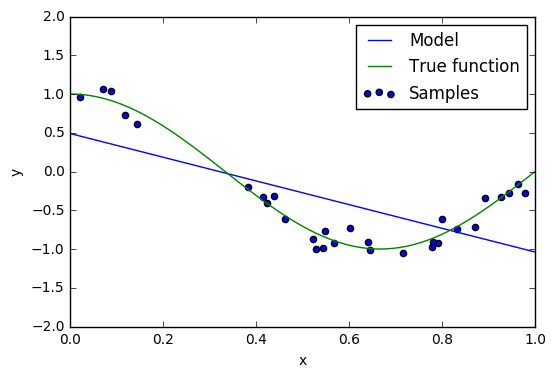

In [178]:
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, my_regression.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, my_function(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")

### Defining polynomial features
The previous example is a simple linear regression and as we can see, the trained model fits the samples (and $f$) quite poorly. As we have seen during the lectures, we can use polynomial features to obtain a more accurate model.

Formally, it consists in defining a polynomial kernel $\phi$ such that of degree $d$ such that, for each $x \in [0, 1]$, we have
$$\phi(x) = \left[1, x, x^2, \dots, x^d\right]$$
In sklearn, this can be achieved with the `sklearn.preprocessing.PolynomialFeatures` function:

In [179]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=1)
polynomial_X = polynomial_features.fit_transform(X[:, np.newaxis])

Note that here we use `np.newaxis` to create an array of single elements. Applying `polynomial_features.fit_transform` to `X` will not lead to the desired result (try it by yourself).

In [180]:
X[:, np.newaxis]

array([[ 0.5488135 ],
       [ 0.71518937],
       [ 0.60276338],
       [ 0.54488318],
       [ 0.4236548 ],
       [ 0.64589411],
       [ 0.43758721],
       [ 0.891773  ],
       [ 0.96366276],
       [ 0.38344152],
       [ 0.79172504],
       [ 0.52889492],
       [ 0.56804456],
       [ 0.92559664],
       [ 0.07103606],
       [ 0.0871293 ],
       [ 0.0202184 ],
       [ 0.83261985],
       [ 0.77815675],
       [ 0.87001215],
       [ 0.97861834],
       [ 0.79915856],
       [ 0.46147936],
       [ 0.78052918],
       [ 0.11827443],
       [ 0.63992102],
       [ 0.14335329],
       [ 0.94466892],
       [ 0.52184832],
       [ 0.41466194]])

So far, we have just created a feature of degree 1, which won't change much the data we have. However, the shape of the polynomial features has changed:

In [181]:
polynomial_X.shape

(30, 2)

In [182]:
X[:, np.newaxis].shape

(30, 1)

Let's take a closer look at what is inside `polynomial_X`.

In [183]:
polynomial_X

array([[ 1.        ,  0.5488135 ],
       [ 1.        ,  0.71518937],
       [ 1.        ,  0.60276338],
       [ 1.        ,  0.54488318],
       [ 1.        ,  0.4236548 ],
       [ 1.        ,  0.64589411],
       [ 1.        ,  0.43758721],
       [ 1.        ,  0.891773  ],
       [ 1.        ,  0.96366276],
       [ 1.        ,  0.38344152],
       [ 1.        ,  0.79172504],
       [ 1.        ,  0.52889492],
       [ 1.        ,  0.56804456],
       [ 1.        ,  0.92559664],
       [ 1.        ,  0.07103606],
       [ 1.        ,  0.0871293 ],
       [ 1.        ,  0.0202184 ],
       [ 1.        ,  0.83261985],
       [ 1.        ,  0.77815675],
       [ 1.        ,  0.87001215],
       [ 1.        ,  0.97861834],
       [ 1.        ,  0.79915856],
       [ 1.        ,  0.46147936],
       [ 1.        ,  0.78052918],
       [ 1.        ,  0.11827443],
       [ 1.        ,  0.63992102],
       [ 1.        ,  0.14335329],
       [ 1.        ,  0.94466892],
       [ 1.        ,

By default, `PolynomialFeatures` adds a constant term equal to 1. It corresponds to the intercept (or degree 0) of the model we are training.

Let's now define another linear regression and train it on the augmented features $\phi(x) = \left[1, x, x^2\right]$.

In [184]:
linear_regression = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_X = polynomial_features.fit_transform(X[:, np.newaxis])
my_regression = linear_regression.fit(polynomial_X, y)

And display the result:

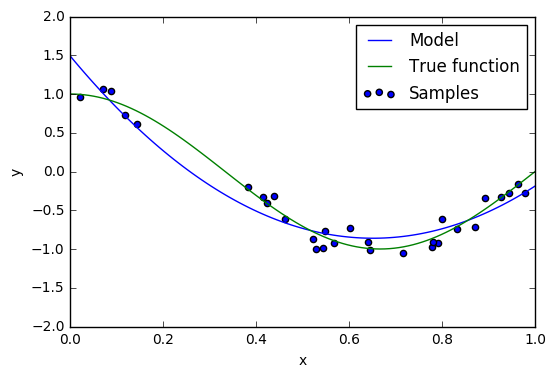

In [185]:
X_test = np.linspace(0, 1, 100)
polynomial_X_test = polynomial_features.fit_transform(X_test[:, np.newaxis])
plt.plot(X_test, my_regression.predict(polynomial_X_test), label="Model")
plt.plot(X_test, my_function(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")

(Note that we need to apply $\phi$ to `X_test` because `my_regression` has been trained on polynomial features!).

As we can see, a second order kernel gives a much better fit than a simple linear regression.

## Putting everything together with pipelines

So far, our regression consists of 2 different steps:
- A polynomial transformation on `X` which returns `polynomial_X`
- A linear regression on `polynomial_X` and `y`

It is possible to write this in a more compact way with a `Pipeline` object, as the following:

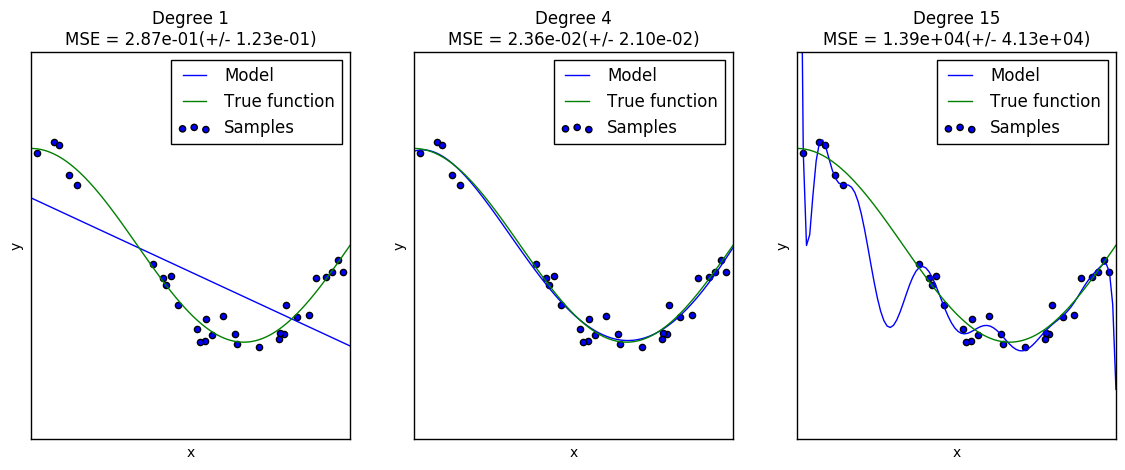

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score

degrees = [1, 4, 15]
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, my_function(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Regularizing the linear regression
The Linear regression we have been working with solves the following problem:
$$\min_w \sum_i \left(w^T \phi\left(x^{(i)}\right) - y^{(i)}\right)^2$$

We can add a regularization term to the optimization problem in order to penalise big coefficients in $w$ and avoid overfitting as a consequence:
$$\min_w \sum_i \left(w^T \phi\left(x^{(i)}\right) - y^{(i)}\right)^2 + \alpha ||w||_2^2$$

Note that this leads to adding an extra parameter, $\alpha$, to the model. As we will see in the following, this parameter has a big impact on how much we overfit or underfit the training data.

In [187]:
from sklearn.linear_model import Ridge

In [188]:
polynomial_features = PolynomialFeatures(degree=15)
polynomial_X = polynomial_features.fit_transform(X[:, np.newaxis])

ridge_regression = Ridge(alpha = .1)
my_regression = ridge_regression.fit(polynomial_X, y)

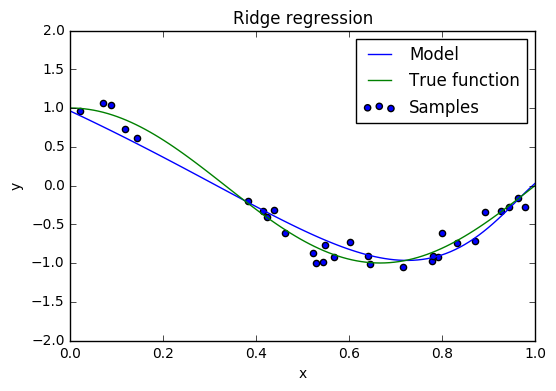

In [189]:
X_test = np.linspace(0, 1, 100)
X_test_polynomial = polynomial_features.fit_transform(X_test[:, np.newaxis])
plt.plot(X_test, my_regression.predict(X_test_polynomial), label="Model")
plt.plot(X_test, my_function(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Ridge regression")

### Support vector regression
Support vector regression (`sklearn.svm.SVR` in sklearn) is another way to train a regression model. The difference with the linear regression with least squares we have used previously is in the loss function:
$$\min_w \sum_i \ell \left(w^T \phi\left(x^{(i)}\right), y^{(i)}\right)$$
For ordinary least squares, we had 
$$\ell \left(w^T \phi\left(x^{(i)}\right), y^{(i)}\right) = \left(w^T \phi\left(x^{(i)}\right) - y^{(i)}\right)^2.$$ For SVR, we have
$$\ell \left(w^T \phi\left(x^{(i)}\right), y^{(i)}\right) = 
\begin{cases}
    0,& \text{if } -\epsilon \leq w^T \phi\left(x\right) - y \leq +\epsilon\\
    \left| w^T \phi\left(x\right) - y \right| - \epsilon,              & \text{otherwise}
\end{cases}.
$$
Having this in mind, we can apply SVR by chosing an apprioriate value for $\epsilon$.

In [190]:
from sklearn.svm import SVR

In [191]:
epsilon = .1
sv_regression = SVR(epsilon = epsilon)
my_svr = sv_regression.fit(polynomial_X, y)

Note that chosing $\epsilon$ with an order of magnitude close to the estimated noise makes sense because we would not penalize errors smaller than the noise.

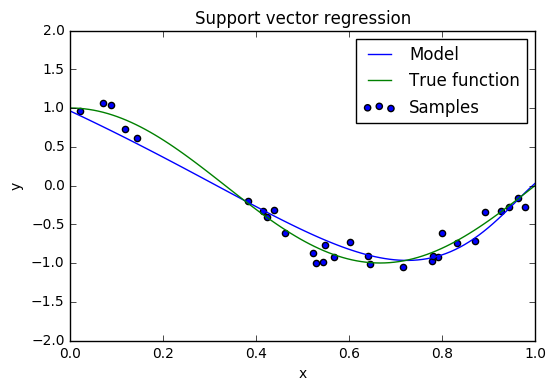

In [192]:
plt.plot(X_test, my_regression.predict(X_test_polynomial), label="Model")
plt.plot(X_test, my_function(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Support vector regression")

## Applying regression to standard datasets
As for classification, sklearn proposes standard datasets to evaluate models. These datasets can be found here: http://scikit-learn.org/stable/datasets/.
Two dataset are suited for regression problem:
- The Boston house-prices dataset
- diabetes dataset

In [193]:
from sklearn import datasets
boston = datasets.load_boston()

In [194]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [195]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [196]:
print boston.data.shape, boston.target.shape

(506, 13) (506,)


In [197]:
polynomial_features = PolynomialFeatures(degree=3)
polynomial_X = polynomial_features.fit_transform(boston.data)

alpha = .1
ridge_regression = Ridge(alpha = alpha)
my_regression = ridge_regression.fit(polynomial_X, boston.target)

In [198]:
predicted_prices = my_regression.predict(polynomial_X)

In [199]:
predicted_prices

array([ 22.57298815,  22.58184344,  32.48203387,  34.74508734,
        35.50833462,  28.64316444,  22.46877583,  21.10652407,
        17.19051339,  19.97924333,  17.9891096 ,  21.88595983,
        20.81987384,  20.77684644,  17.84222261,  20.41148693,
        23.55173429,  17.90646974,  20.15951286,  17.87542237,
        13.13744312,  16.75389545,  16.56296625,  14.51019764,
        16.09405415,  14.4357958 ,  15.61115318,  15.48960618,
        18.47799047,  20.84840192,  12.84766484,  14.85902245,
        12.89709631,  13.24705661,  13.73076135,  20.97099776,
        20.46873771,  21.53646451,  23.75636441,  31.22981943,
        34.69668015,  28.95071356,  22.45373405,  23.49541832,
        22.16276543,  20.51748364,  20.461273  ,  16.57500012,
        14.03617847,  18.76501108,  20.52708037,  22.06137793,
        24.91140249,  22.02059845,  18.81471051,  35.86258733,
        24.37521256,  31.57526903,  22.01578141,  20.34504726,
        18.96494316,  16.07517666,  21.64088218,  26.61

In [200]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(polynomial_X, boston.target, test_size = 0.5)

In [201]:
print features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

(253, 560) (253, 560) (253,) (253,)


In [202]:
from sklearn import metrics

In [203]:
predicted_labels_train = my_regression.predict(features_train)
print "MSE on the train set: ", metrics.mean_squared_error(labels_train, predicted_labels_train)
predicted_labels_test = my_regression.predict(features_test)
print "MSE on the test set: ", metrics.mean_squared_error(labels_test, predicted_labels_test)

MSE on the train set:  1.85059163489
MSE on the test set:  2.17736883451


Feel free to tune the parameters manually and see which one gives the best results.